In [141]:
import numpy as np
import pickle as pkl
import torch
from sklearn.model_selection import train_test_split
import torch.nn as nn   
import time
import torch.optim as optim
import torch
from torch.utils.data import TensorDataset, DataLoader

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

def load_data(path):
    with open(path, 'rb') as f:
        data = pkl.load(f)
    return data

# Load the data
Interaction_matrices = load_data('interaction_matrices_10binned.pkl')
spectral_data = load_data('spectra_dataset_10binned.pkl')

print(Interaction_matrices.shape)
print(spectral_data.shape)

cpu
torch.Size([100000, 6, 6])
torch.Size([100000, 2000])


In [142]:
print(Interaction_matrices[1:10])

tensor([[[0.0000e+00, 2.3849e-04, 0.0000e+00, 0.0000e+00, 0.0000e+00,
          0.0000e+00],
         [0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 6.5487e-01,
          0.0000e+00],
         [0.0000e+00, 0.0000e+00, 5.6142e-01, 4.7218e-01, 0.0000e+00,
          9.5730e-03],
         [1.1606e-01, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
          0.0000e+00],
         [0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 3.5414e-01,
          0.0000e+00],
         [0.0000e+00, 9.7943e-02, 0.0000e+00, 0.0000e+00, 0.0000e+00,
          0.0000e+00]],

        [[0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
          0.0000e+00],
         [0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
          0.0000e+00],
         [0.0000e+00, 6.2552e-01, 0.0000e+00, 0.0000e+00, 0.0000e+00,
          9.3345e-01],
         [0.0000e+00, 0.0000e+00, 0.0000e+00, 3.6906e-01, 2.3893e-01,
          0.0000e+00],
         [0.0000e+00, 0.0000e+00, 3.0346e-02, 0.0000e+00, 0.0000e+00

In [171]:
import numpy as np
import torch

# Flatten each matrix separately then store in an array
flattened_matrices = [matrix.flatten() for matrix in Interaction_matrices]

# Stack the flattened matrices on top to give shape N x 36
flattened_matrix = torch.stack(flattened_matrices)
print(flattened_matrix.shape)
flattened_matrices = torch.tensor(flattened_matrix, dtype=torch.float32)

print(flattened_matrix[0:10]) ## fine. 

torch.Size([100000, 36])
tensor([[0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         6.9883e-01, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         4.9843e-01, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 9.3328e-01, 7.5089e-01, 0.0000e+00, 0.0000e+00,
         3.0173e-01, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 2.3849e-04, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 6.5487e-01, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 5.6142e-01, 4.7218e-01, 0.0000e+00, 9.5730e-03,
         1.1606e-01, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 3.5414e-01, 0.0000e+00,
         0.0000e+00, 9.7943e-02, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
 

/var/folders/02/fvfmdq_j709g1tthj47t5fcm0000gn/T/ipykernel_76017/542283459.py:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  flattened_matrices = torch.tensor(flattened_matrix, dtype=torch.float32)


In [173]:
print(flattened_matrix[1])
print(flattened_matrix.dtype)


tensor([0.0000e+00, 2.3849e-04, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 6.5487e-01, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 5.6142e-01, 4.7218e-01, 0.0000e+00, 9.5730e-03,
        1.1606e-01, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 3.5414e-01, 0.0000e+00,
        0.0000e+00, 9.7943e-02, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00])
torch.float32


In [174]:
import pandas as pd
import torch
import numpy as np


# need to turn tensors to pandas df then append my flattened matrices to the end.
matrix_columns = [f'PA{i // 6}PB{i % 6}' for i in range(len(flattened_matrices[0]))]

bnry_int_mat_df = pd.DataFrame(flattened_matrices, columns = matrix_columns)
print(bnry_int_mat_df.shape)
print(bnry_int_mat_df)
spec_df = pd.DataFrame(spectral_data)
print(spec_df.shape)
print(spec_df.dtypes)
print(bnry_int_mat_df.dtypes)


(100000, 36)
       PA0PB0    PA0PB1    PA0PB2  PA0PB3  PA0PB4    PA0PB5    PA1PB0  \
0         0.0  0.000000  0.000000     0.0     0.0  0.000000  0.698825   
1         0.0  0.000238  0.000000     0.0     0.0  0.000000  0.000000   
2         0.0  0.000000  0.000000     0.0     0.0  0.000000  0.000000   
3         0.0  0.590379  0.000000     0.0     0.0  0.757387  0.000000   
4         0.0  0.000000  0.000000     0.0     0.0  0.000000  0.196453   
...       ...       ...       ...     ...     ...       ...       ...   
99995     0.0  0.603816  0.841153     0.0     0.0  0.000000  0.000000   
99996     0.0  0.714708  0.488617     0.0     0.0  0.000000  0.548852   
99997     0.0  0.000000  0.000000     0.0     0.0  0.000000  0.279194   
99998     0.0  0.000000  0.000000     0.0     0.0  0.000000  0.000000   
99999     0.0  0.000000  0.000000     0.0     0.0  0.000000  0.109624   

         PA1PB1  PA1PB2    PA1PB3  ...    PA4PB2  PA4PB3    PA4PB4    PA4PB5  \
0      0.000000     0.0  0.000

In [175]:
# next  concat the two together 
import pandas as pd



concat_df = pd.concat([spec_df, bnry_int_mat_df], axis =1)

In [176]:
print(concat_df.shape)
concat_df.iloc[1, 2000:] # row 1 and all columns after 2000 - where the int matrices start


(100000, 2036)


PA0PB0    0.000000
PA0PB1    0.000238
PA0PB2    0.000000
PA0PB3    0.000000
PA0PB4    0.000000
PA0PB5    0.000000
PA1PB0    0.000000
PA1PB1    0.000000
PA1PB2    0.000000
PA1PB3    0.000000
PA1PB4    0.654868
PA1PB5    0.000000
PA2PB0    0.000000
PA2PB1    0.000000
PA2PB2    0.561424
PA2PB3    0.472181
PA2PB4    0.000000
PA2PB5    0.009573
PA3PB0    0.116056
PA3PB1    0.000000
PA3PB2    0.000000
PA3PB3    0.000000
PA3PB4    0.000000
PA3PB5    0.000000
PA4PB0    0.000000
PA4PB1    0.000000
PA4PB2    0.000000
PA4PB3    0.000000
PA4PB4    0.354136
PA4PB5    0.000000
PA5PB0    0.000000
PA5PB1    0.097943
PA5PB2    0.000000
PA5PB3    0.000000
PA5PB4    0.000000
PA5PB5    0.000000
Name: 1, dtype: float32

In [177]:
# concat_df.to_csv("binned_by_10_labelled_ANN.csv") # save the data to a csv file.  but its too big lol

In [178]:
# import libraries
import torch
import torch.nn as nn



device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)


cpu


In [179]:
# pre process data some more
print(concat_df.dtypes)

X_spec = concat_df.iloc[:, :2000].values # spectra data # iloc in pandas is used to select rows and columns by number, in the order that they appear in the data frame.
Y_matr = concat_df.iloc[:, 2000:].values # matrices 

print(X_spec.shape)
print(Y_matr.shape)

print(X_spec.dtype)
print(Y_matr.dtype)



0         float32
1         float32
2         float32
3         float32
4         float32
           ...   
PA5PB1    float32
PA5PB2    float32
PA5PB3    float32
PA5PB4    float32
PA5PB5    float32
Length: 2036, dtype: object
(100000, 2000)
(100000, 36)
float32
float32


In [180]:
import torch
import torch.nn as nn
from sklearn.model_selection import train_test_split

# splitting into train test val split 80, 20 
X_train, X_test, y_train, y_test = train_test_split(X_spec, Y_matr, test_size=0.2, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.2, random_state=42)

print(y_val.dtype)
print(X_val.dtype)
print(X_train.dtype)
print(y_train.dtype)


float32
float32
float32
float32


In [193]:
import torch 
from torch.utils.data import DataLoader, TensorDataset

X_train = torch.Tensor(X_train).to(device)
X_test = torch.Tensor(X_test).to(device)
X_val = torch.Tensor(X_val).to(device)
y_val= torch.Tensor(y_val).to(device)
y_train = torch.Tensor(y_train).to(device)
y_test = torch.Tensor(y_test).to(device)


batch_size = 512 ## 512 is a good number for now. ?? 256 also worked well.
train_dataset = TensorDataset(X_train, y_train)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

In [182]:
print(X_train.shape) # confirmed shape 8000,2000

torch.Size([80000, 2000])


In [198]:
class SpectralNet(nn.Module):
    def __init__(self):
        super(SpectralNet, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(2000, 1024),
            nn.BatchNorm1d(1024),
            nn.ReLU(),
            nn.Linear(1024, 512),
            nn.ReLU(),
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.Linear(256, 128),  # Added layer
            nn.ReLU(),  # Added activation function
            nn.Linear(128, 36),
            nn.Sigmoid()
        )
    def forward(self, x):
        return self.model(x)

In [199]:
from torch.optim.lr_scheduler import ReduceLROnPlateau

model = SpectralNet().to(device)
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001) # 0.001 works better for some reason
#scheduler = ReduceLROnPlateau(optimizer, 'min', patience=10, factor=0.5, min_lr=1e-6)

In [200]:
print(model)

SpectralNet(
  (model): Sequential(
    (0): Linear(in_features=2000, out_features=1024, bias=True)
    (1): BatchNorm1d(1024, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Linear(in_features=1024, out_features=512, bias=True)
    (4): ReLU()
    (5): Linear(in_features=512, out_features=256, bias=True)
    (6): ReLU()
    (7): Linear(in_features=256, out_features=128, bias=True)
    (8): ReLU()
    (9): Linear(in_features=128, out_features=36, bias=True)
    (10): Sigmoid()
  )
)


In [202]:
# Training loop
epoch_losses = []
epoch_accuracies = []


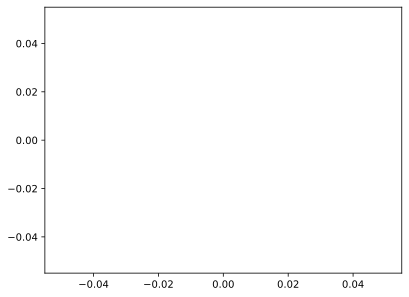

In [203]:
import matplotlib.pyplot as plt

plt.plot(epoch_losses)

In [204]:
num_epochs = 100


for epoch in range(num_epochs):
    epoch_loss = 0
    epoch_accuracy = 0

    for batch_X, batch_y in train_loader:
        # Forward pass
        outputs = model(batch_X)
        loss = criterion(outputs, batch_y)
        epoch_loss += loss.item()

        # Backpropagation and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()


    epoch_loss /= len(train_loader)
    epoch_losses.append(epoch_loss)
    epoch_accuracy /= len(train_loader)
    epoch_accuracies.append(epoch_accuracy)


    # Print the loss and accuracy every 100 epochs
    if (epoch + 1) % 10 == 0:
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}, Accuracy: {epoch_accuracy:.2f}%")
     
    if (epoch + 1) % 100 == 0:
        state = {
            'epoch': epoch + 1,
            'state_dict': model.state_dict(),
            'optimizer': optimizer.state_dict(),
            'loss': epoch_losses
        }
        torch.save(state, "spectral_net_model.pth") ## save the model every 100 epochs
        print("Saved model to:", "spectral_net_model.pth")   

Epoch [10/100], Loss: 0.3105, Accuracy: 0.00%
Epoch [20/100], Loss: 0.3099, Accuracy: 0.00%
Epoch [30/100], Loss: 0.3091, Accuracy: 0.00%
Epoch [40/100], Loss: 0.3075, Accuracy: 0.00%
Epoch [50/100], Loss: 0.3045, Accuracy: 0.00%
Epoch [60/100], Loss: 0.3002, Accuracy: 0.00%
Epoch [70/100], Loss: 0.2956, Accuracy: 0.00%
Epoch [80/100], Loss: 0.2912, Accuracy: 0.00%
Epoch [90/100], Loss: 0.2874, Accuracy: 0.00%
Epoch [100/100], Loss: 0.2842, Accuracy: 0.00%
Saved model to: spectral_net_model.pth


 lr 0.001 and 512 batch size works best - epoch loss decreased most. 
 going to try adding one more layer and see how it goes
 added in batchnorm1d first to see what happens then will add a layer if neccessary - this helped tremendously with that lr and batch_size. loss has decreased from 0.3105 to 0.3002 in just 60 epochs.
 without batchnorm1d it decreased 0.0002 for 100 epochs. Amazing.
 

In [ ]:
import torch
import os
import torch.nn as nn
import torch.optim as optim




def load_checkpoint(model, optimizer, loss, filename='checkpoint.pth.tar'):
    # Note: Input model & optimizer should be pre-defined.  This routine only updates their states.
    start_epoch = 0
    if os.path.isfile(filename):
        print("=> loading checkpoint '{}'".format(filename))
        checkpoint = torch.load(filename)
        start_epoch = checkpoint['epoch']
        model.load_state_dict(checkpoint['state_dict'])
        optimizer.load_state_dict(checkpoint['optimizer'])
        loss = checkpoint['epoch_losses']
        print("=> loaded checkpoint '{}' (epoch {})"
                  .format(filename, checkpoint['epoch']))
    else:
        print("=> no checkpoint found at '{}'".format(filename))

    return model, optimizer, start_epoch, loss

In [105]:
min_missing = 1
max_missing = 10
num_missing = np.random.randint(min_missing, max_missing + 1)
idx = np.random.choice(np.arange(6 * 6), size=(6 * 6 - num_missing), replace=False)

print(num_missing)

3


In [66]:
import torch
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming you have the following variables:
# - model: Your trained PyTorch model
# - X_val: Validation or test input data
# - y_test: True labels for the validation or test set

# Evaluate the model on the test set
with torch.no_grad():
    outputs = model(X_val)
    predictions = outputs.cpu().numpy() >= 0.5
    y_true = y_val.cpu().numpy()

# Calculate accuracy
accuracy = accuracy_score(y_true, predictions)
print(f"Accuracy: {accuracy:.4f}") ## cant be used for multi label classification 

# Calculate precision for each class
precision = precision_score(y_true, predictions, average=None)
print(f"Precision for each class: {precision}")

# Calculate recall for each class
recall = recall_score(y_true, predictions, average=None)
print(f"Recall for each class: {recall}")

# Calculate F1-score for each class
f1 = f1_score(y_true, predictions, average=None)
print(f"F1-score for each class: {f1}")

# Calculate micro-averaged precision, recall, and F1-score
micro_precision = precision_score(y_true, predictions, average='micro')
micro_recall = recall_score(y_true, predictions, average='micro')
micro_f1 = f1_score(y_true, predictions, average='micro')
print(f"Micro-averaged Precision: {micro_precision:.4f}")
print(f"Micro-averaged Recall: {micro_recall:.4f}")
print(f"Micro-averaged F1-score: {micro_f1:.4f}")

# Calculate macro-averaged precision, recall, and F1-score
macro_precision = precision_score(y_true, predictions, average='macro')
macro_recall = recall_score(y_true, predictions, average='macro')
macro_f1 = f1_score(y_true, predictions, average='macro')
print(f"Macro-averaged Precision: {macro_precision:.4f}")
print(f"Macro-averaged Recall: {macro_recall:.4f}")
print(f"Macro-averaged F1-score: {macro_f1:.4f}")


## for each specta make f1 score then vary the threshold and see how it changes then average.
## miro aupr and macro aupr trapezoidal rule for each column (class) precision recall curve from all the data
## average and then plot the aupr curve for each class.
## find the blogs 
## kflod cross validation has to be done for each model and then the average of the results has to be taken.

Accuracy: 0.0000
Precision for each class: [0.         0.50243902 0.5        0.45673077 0.56521739 0.52840909
 0.45283019 0.49537037 0.49769585 0.52763819 0.51219512 0.51851852
 0.48858447 0.5212766  0.44239631 0.50925926 0.51295337 0.5255102
 0.48958333 0.44230769 0.47715736 0.53809524 0.49468085 0.54589372
 0.52791878 0.48058252 0.53333333 0.43718593 0.48039216 0.50273224
 0.47058824 0.5        0.52197802 0.49509804 0.46268657 0.50485437]
Recall for each class: [0.         0.5255102  0.44607843 0.4973822  0.52702703 0.45812808
 0.5106383  0.53768844 0.5625     0.49065421 0.5        0.49246231
 0.54871795 0.49246231 0.47761194 0.56122449 0.48529412 0.5255102
 0.47715736 0.54761905 0.47474747 0.53554502 0.5        0.56218905
 0.51485149 0.52659574 0.46846847 0.47540984 0.49       0.43809524
 0.47761194 0.50505051 0.47979798 0.52061856 0.48691099 0.51231527]
F1-score for each class: [0.         0.51371571 0.47150259 0.47619048 0.54545455 0.49076517
 0.48       0.51566265 0.52811736 0.50

/Users/sanazkazeminia/anaconda3/envs/Mass_Spec/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sanazkazeminia/anaconda3/envs/Mass_Spec/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sanazkazeminia/anaconda3/envs/Mass_Spec/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1757: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score